- references
    - https://www.youtube.com/watch?v=KmqTrm-bn8k

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
# this function is the numerator of the target distribution
# 分子部分
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
# normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-(x-mu)**2/sigma**2/2)

In [4]:
NORMALIZER = scipy.integrate.quad(f, -np.inf, np.inf)[0]

In [5]:
NORMALIZER

6.7792064370220055

## target distribution ($p(x)$)

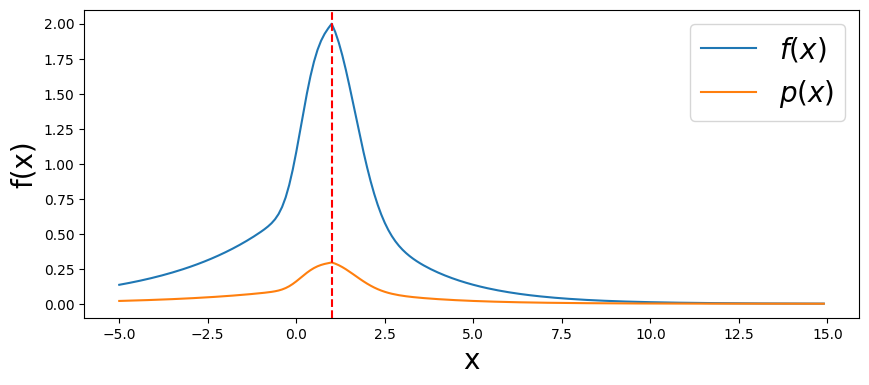

In [11]:
x_vals = np.arange(-5, 15, .1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORMALIZER for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['$f(x)$', '$p(x)$'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

In [7]:
sum(p_vals)

9.409292472410552

In [12]:
# 基于梯形规则（trapezoidal rule）对离散数据进行积分计算
np.trapz(p_vals, x_vals)

0.9399240121913706

$$
\sum_{a}^bf(x)dx\approx\sum_{i=1}^{n-1}\frac12(x_{i+1}-x_i)\cdot(f(x_{i+1})+f(x_i))
$$

In [16]:
area = 0
for i in range(1, len(x_vals)):
    dx = x_vals[i] - x_vals[i-1]
    area += 0.5 * dx * (p_vals[i] + p_vals[i-1])
area

0.9399240121913707

In [15]:
# 定义标准正态分布的 PDF
def gaussian_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 定义积分区间
x = np.linspace(-5, 5, 1000)  # 在 [-5, 5] 区间生成 1000 个点
y = gaussian_pdf(x)          # 计算每个点的 PDF 值

# 使用 np.trapz 进行积分
np.trapz(y, x)

0.9999994265727195

In [13]:
true_mu = scipy.integrate.quad(lambda x: x*f(x)/NORMALIZER, -np.inf, np.inf)[0]
true_mu

0.26962356251087716

## case1: Acept-Reject with $\mathcal N(0, 3)$

Text(0.5, 1.0, 'M=1')

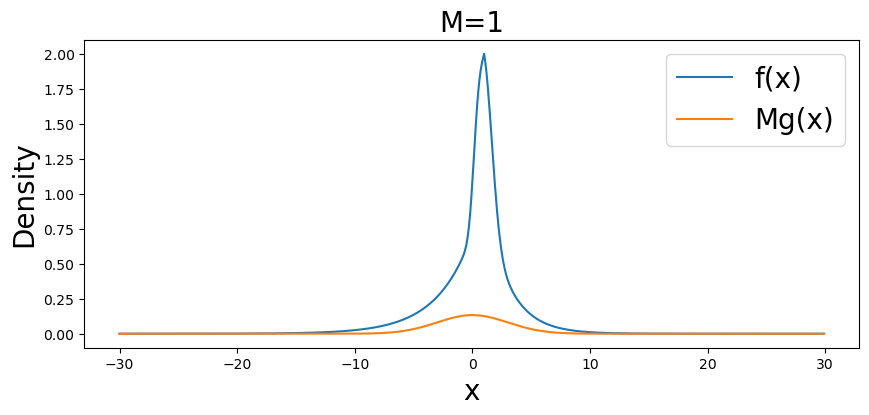

In [22]:

x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=10')

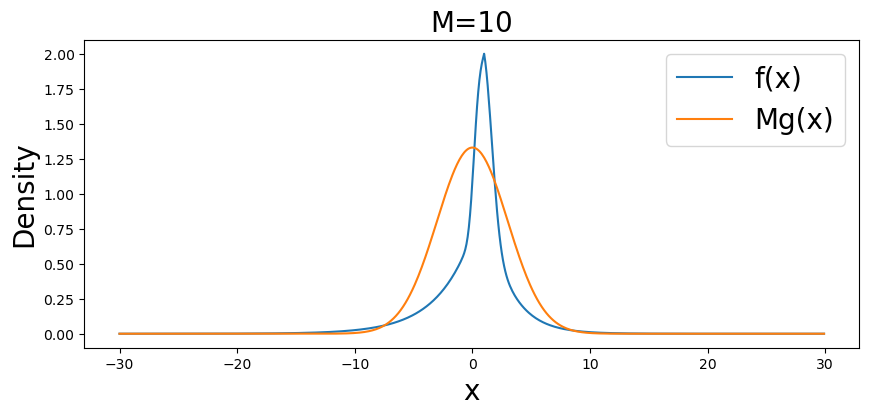

In [23]:

x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 10

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 1.0)

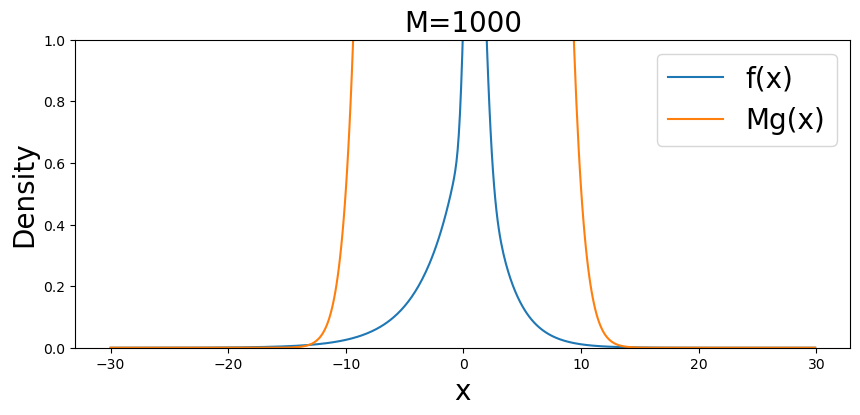

In [31]:
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,1)

In [32]:
#collect all accepted samples here
samples = []

#try this many candidates
N = 1000000

for _ in range(N):
    #sample a candidate
    candidate = np.random.normal(0, 3)
    
    #calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0, 3))
    
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [33]:
len(samples)*1./N

0.006778

In [35]:
np.mean(samples)

0.2754017225189198

In [36]:
true_mu

0.26962356251087716

(-15.0, 15.0)

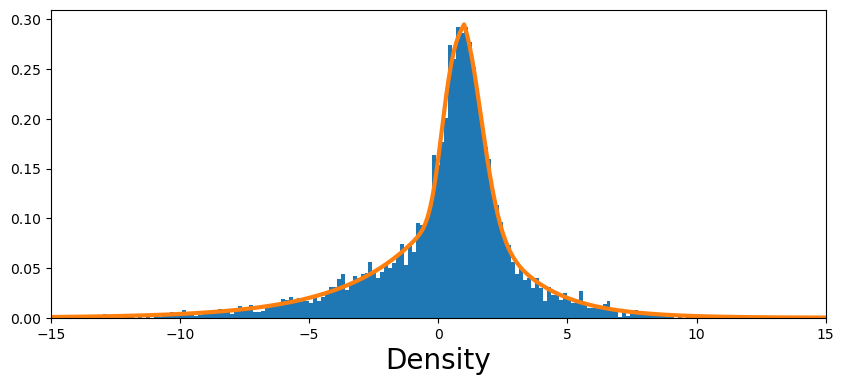

In [39]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORMALIZER for f in f_vals], linewidth=3)
plt.xlim(-15,15)

Text(0.5, 1.0, 'Correlation: -0.0')

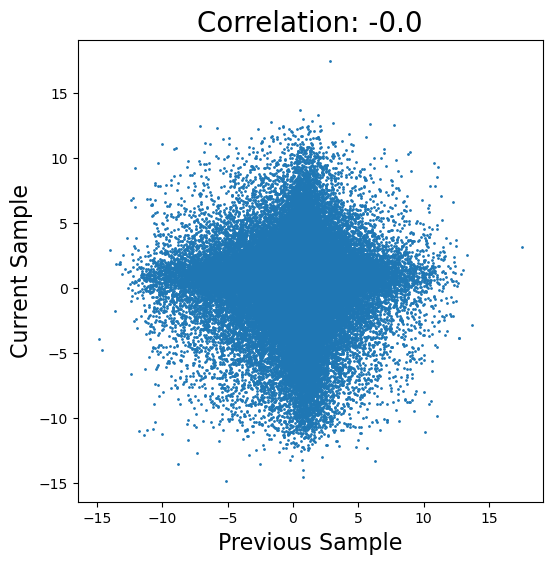

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(stats.pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

## Case 2 : Accept-Reject with $\mathcal N(1,4)$ Candidate

Text(0.5, 1.0, 'M=1')

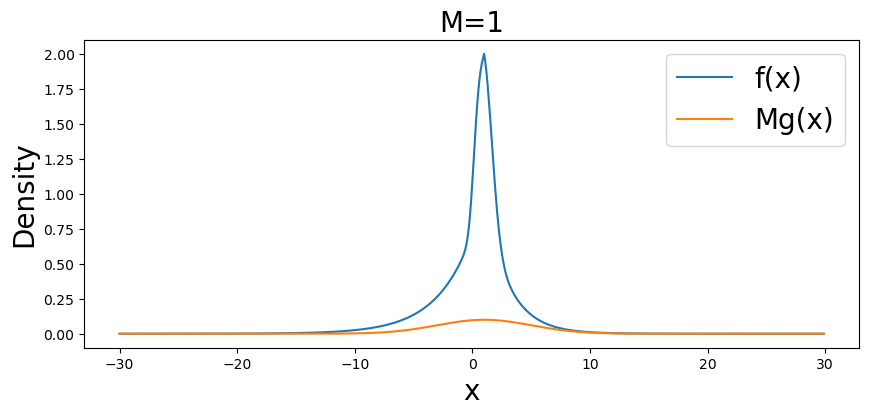

In [43]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=75')

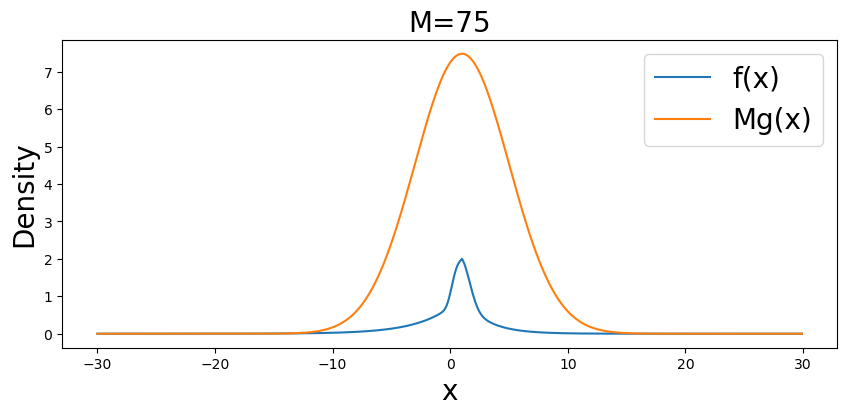

In [44]:
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

In [45]:
samples = []
N = 1000000
for _ in range(N):
    #get a candidate from uniform distribution
    candidate = np.random.normal(1, 4)
    
    #calculate probabailty of accepting this sample
    prob_accept = f(candidate) / (M*g(candidate, 1, 4))
    
    #accept sample with this probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [46]:
len(samples)*1./N

0.090373

(-15.0, 15.0)

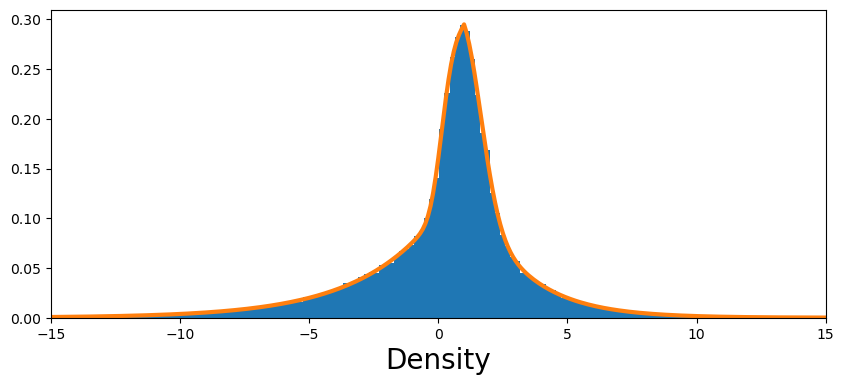

In [49]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORMALIZER for f in f_vals], linewidth=3)
plt.xlim(-15,15)

In [50]:
np.mean(samples)

0.30664372124570266

Text(0.5, 1.0, 'Correlation: -0.0')

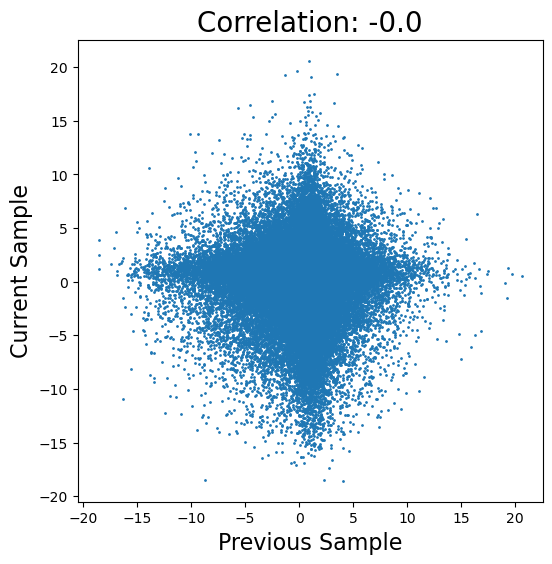

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(stats.pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

## Case 3 : Metropolis Algorithm with $\mathcal N(x_{\text{prev}}, 4)$ Candidate

In [53]:
samples = [1]
num_accept = 0

for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])

In [54]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

In [55]:
len(retained_samples)*1./ N

0.999

(-15.0, 15.0)

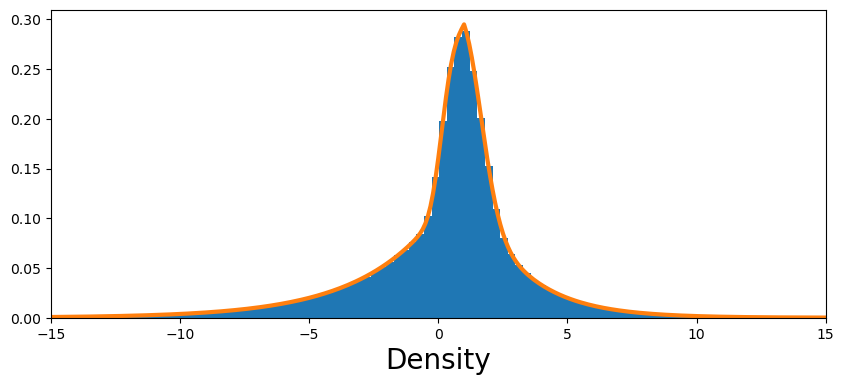

In [57]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORMALIZER for f in f_vals], linewidth=3)
plt.xlim(-15,15)

Text(0.5, 1.0, 'Correlation: 0.81')

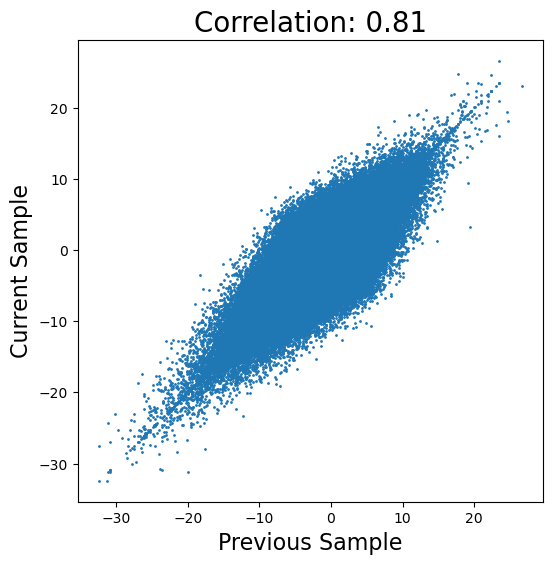

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(stats.pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)